# Introduction to Data Science - Week 1 Raw Data is an Oxymoron

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

The training dataset for this week comes from [Box Office Performance of Movies with Female Leads](https://www.kaggle.com/datasets/thedevastator/box-office-performance-of-movies-with-female-lea). This dataset explores the impact of gender on box office success. It looks at data from films released between 1970 and 2013, including their budgets, domestic and international gross earnings, and their pass/fail status on the Bechdel Test - a benchmark measuring gender biases in movies.

The dataset gives us an opportunity to investigate how men and women are portrayed in films over time, explore gendered earning gaps in Hollywood, answer questions about movie trends through the decades such as whether or not films with strong female roles outgross those without them when adjusted for inflation. 

In [16]:
# Read in data
df = pd.read_csv("../data/movies.csv")

In [17]:
df.columns

Index(['index', 'year', 'imdb', 'title', 'test', 'clean_test', 'binary',
       'budget', 'domgross', 'intgross', 'code', 'budget_2013$',
       'domgross_2013$', 'intgross_2013$', 'period code', 'decade code'],
      dtype='object')

In [18]:
df.dtypes

index               int64
year                int64
imdb               object
title              object
test               object
clean_test         object
binary             object
budget              int64
domgross          float64
intgross          float64
code               object
budget_2013$        int64
domgross_2013$    float64
intgross_2013$    float64
period code       float64
decade code       float64
dtype: object

- `year`: Year the movie was released.
- `imdb`: IMDB rating of the movie.
- `title`: Title of the movie.
- `test`: Whether or not the movie passed the Bechdel Test.
- `clean_test`: Whether or not the movie passed the Bechdel Test without any caveats.
- `binary`: Whether or not the movie passed the Bechdel Test.
- `budget`: Budget of the movie in millions.
- `domgross`: Domestic gross of the movie in millions.
- `intgross`: International gross of the movie in millions.
- `code`: Genre code of the movie.
- `budget_2013$`: Budget of the movie in 2013 dollars.
- `domgross_2013$`: Domestic gross of the movie in 2013 dollars.
- `intgross_2013$`: International gross of the movie in 2013 dollars.
- `period code`: Period code of the movie.
- `decade code`: Decade code of the movie.

In [19]:
df["binary"].describe()

count     1794
unique       2
top       FAIL
freq       991
Name: binary, dtype: object

## How do high rated movies perform in the Bechdel test ?

In [20]:
# imdb like "tt678990", so I need to change them into float
df["imdb"] = df["imdb"].astype(str)
df["imdb"] = df["imdb"].str[2:].astype(float)

In [22]:
# top 10 IMDB
top_imdb_movies = df.sort_values(by="imdb", ascending=False).head(10)
print("Top 10 movies by IMDB rating:")
print(top_imdb_movies[["title","binary","imdb"]])


Top 10 movies by IMDB rating:
                  title binary       imdb
29               Gloria   PASS  2425486.0
76             The Heat   PASS  2404463.0
71           The Family   FAIL  2404311.0
58        Runner Runner   FAIL  2364841.0
98     White House Down   FAIL  2334879.0
13         Blue Jasmine   PASS  2334873.0
47   Olympus Has Fallen   FAIL  2302755.0
26               Frozen   PASS  2294629.0
117            Hannibal   PASS  2243973.0
81       The Internship   FAIL  2234155.0


This part is written by ChatGPT.

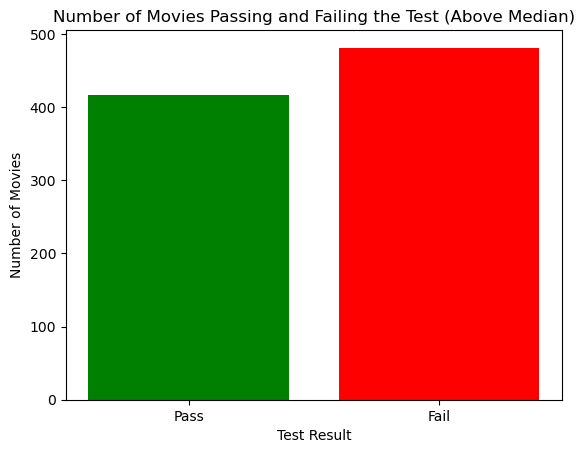

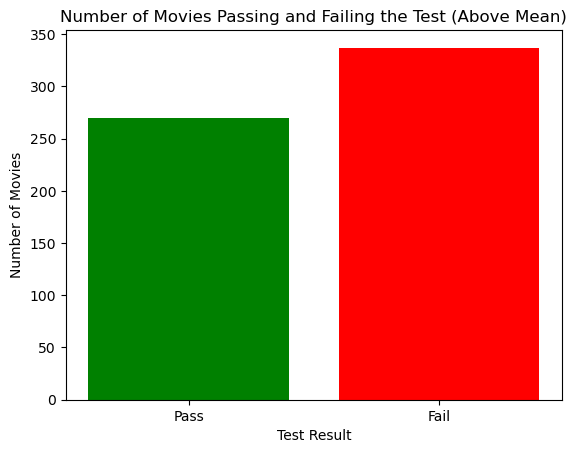

In [26]:
labels = ['Pass', 'Fail']
median_imdb = df['imdb'].median()
mean_imdb = df['imdb'].mean()

# Calculate the number of movies above median
above_median = df[df['imdb'] > median_imdb]

# Calculate the number of movies above mean
above_mean = df[df['imdb'] > mean_imdb]

# Calculate the number of movies passing and failing the test above median
pass_count_median = above_median[above_median['binary'] == 'PASS']['binary'].count()
fail_count_median = above_median[above_median['binary'] == 'FAIL']['binary'].count()

# Calculate the number of movies passing and failing the test above mean
pass_count_mean = above_mean[above_mean['binary'] == 'PASS']['binary'].count()
fail_count_mean = above_mean[above_mean['binary'] == 'FAIL']['binary'].count()

fig, ax1 = plt.subplots()
ax1.bar(labels, [pass_count_median, fail_count_median], color=['green', 'red'])
ax1.set_xlabel("Test Result")
ax1.set_ylabel("Number of Movies")
ax1.set_title("Number of Movies Passing and Failing the Test (Above Median)")

fig, ax2 = plt.subplots()
ax2.bar(labels, [pass_count_mean, fail_count_mean], color=['green', 'red'])
ax2.set_xlabel("Test Result")
ax2.set_ylabel("Number of Movies")
ax2.set_title("Number of Movies Passing and Failing the Test (Above Mean)")

plt.show()

## How do high grossing movies perform in the Bechdel test ?

In [27]:
top_budget_movies = df.sort_values(by='budget', ascending=False).head(10)
print("Top 10 movies by budget:")
print(top_budget_movies[['title','binary','budget']])

Top 10 movies by budget:
                                            title binary     budget
454                                        Avatar   FAIL  425000000
705  Pirates of the Caribbean: At World&#39;s End   PASS  300000000
158                         The Dark Knight Rises   FAIL  275000000
83                                The Lone Ranger   FAIL  275000000
121                                   John Carter   PASS  275000000
393                                       Tangled   PASS  260000000
77            The Hobbit: The Desolation of Smaug   FAIL  250000000
163             The Hobbit: An Unexpected Journey   FAIL  250000000
256   Pirates of the Caribbean: On Stranger Tides   FAIL  250000000
484        Harry Potter and the Half-Blood Prince   PASS  250000000


In [28]:
top_grossing_movies = df.sort_values(by='intgross', ascending=False).head(10)
print("Top 10 movies by international gross:")
print(top_grossing_movies[['title','binary','intgross']])

Top 10 movies by international gross:
                                               title binary      intgross
454                                           Avatar   FAIL  2.783919e+09
1445                                         Titanic   PASS  2.185672e+09
219     Harry Potter and the Deathly Hallows: Part 2   FAIL  1.328111e+09
36                                        Iron Man 3   FAIL  1.212692e+09
1060   The Lord of the Rings: The Return of the King   FAIL  1.141409e+09
299                   Transformers: Dark of the Moon   PASS  1.123794e+09
148                                          Skyfall   FAIL  1.108694e+09
158                            The Dark Knight Rises   FAIL  1.079344e+09
424                                      Toy Story 3   FAIL  1.063759e+09
782   Pirates of the Caribbean: Dead Man&#39;s Chest   FAIL  1.060616e+09


In [29]:
top_domgrossing_movies = df.sort_values(by='domgross', ascending=False).head(10)
print("Top 10 movies by domestic gross:")
print(top_domgrossing_movies[['title','binary','domgross']])

Top 10 movies by domestic gross:
                                               title binary     domgross
454                                           Avatar   FAIL  760507625.0
1445                                         Titanic   PASS  658672302.0
634                                  The Dark Knight   FAIL  533345358.0
1315       Star Wars: Episode I - The Phantom Menace   PASS  474544677.0
1759                                       Star Wars   FAIL  460998007.0
158                            The Dark Knight Rises   FAIL  448139099.0
980                                          Shrek 2   PASS  441226247.0
1707                     E.T.: The Extra-Terrestrial   FAIL  435110554.0
79                   The Hunger Games: Catching Fire   PASS  424088260.0
782   Pirates of the Caribbean: Dead Man&#39;s Chest   FAIL  423315812.0


## How do high net income movies perform in the Bechdel test ?

In [30]:
df['net_income'] = df['intgross'] - df['budget']

In [32]:
top_net_income_movies = df.sort_values(by='net_income', ascending=False).head(10)
print("Top 10 movies by net income:")
print(top_net_income_movies[['title','binary','net_income']])

Top 10 movies by net income:
                                              title binary    net_income
454                                          Avatar   FAIL  2.358919e+09
1445                                        Titanic   PASS  1.985672e+09
219    Harry Potter and the Deathly Hallows: Part 2   FAIL  1.203111e+09
1060  The Lord of the Rings: The Return of the King   FAIL  1.047409e+09
36                                       Iron Man 3   FAIL  1.012692e+09
1557                                  Jurassic Park   PASS  9.726269e+08
299                  Transformers: Dark of the Moon   PASS  9.287941e+08
148                                         Skyfall   FAIL  9.086941e+08
17                                  Despicable Me 2   PASS  8.947660e+08
1315      Star Wars: Episode I - The Phantom Menace   PASS  8.920447e+08


In [33]:
df['net_income_ratio'] = (df['net_income'] / df['budget']) 

In [34]:
top_net_income_ratio_movies = df.sort_values(by='net_income_ratio', ascending=False).head(10)
print("Top 10 movies by net income ratio:")
print(top_net_income_ratio_movies[['title','binary','net_income_ratio']])

Top 10 movies by net income ratio:
                              title binary  net_income_ratio
703             Paranormal Activity   FAIL        430.517853
1319        The Blair Witch Project   PASS        412.833333
1575                    El Mariachi   FAIL        290.704000
1764                          Rocky   FAIL        224.000000
1777   The Texas Chain Saw Massacre   FAIL        188.803136
1778           The Towering Inferno   FAIL        188.803136
1780              American Graffiti   FAIL        179.180180
1527                        Clerks.   FAIL        143.231111
778                            Once   FAIL        125.647827
1772  The Rocky Horror Picture Show   FAIL        115.563681


## Is the data changing from 1990 to 2013?

This part is written by ChatGPT.

In [37]:
grouped = df.groupby('decade code')

df_2010_after = grouped.get_group(1)
df_2000_2010 = grouped.get_group(2)
df_1990_2000 = grouped.get_group(3)

In [39]:
# For movies released after 2010
pass_count_2010_after = df_2010_after['binary'].value_counts()['PASS']
fail_count_2010_after = df_2010_after['binary'].value_counts()['FAIL']

total_count_2010_after = pass_count_2010_after + fail_count_2010_after

pass_percentage_2010_after = (pass_count_2010_after / total_count_2010_after) * 100
fail_percentage_2010_after = (fail_count_2010_after / total_count_2010_after) * 100

print("Number and percentage of movies passing the test after 2010:")
print("Number of movies passing the test: ", pass_count_2010_after)
print("Percentage of movies passing the test: ", pass_percentage_2010_after, "%")
print("Number of movies failing the test: ", fail_count_2010_after)
print("Percentage of movies failing the test: ", fail_percentage_2010_after, "%")

Number and percentage of movies passing the test after 2010:
Number of movies passing the test:  197
Percentage of movies passing the test:  44.97716894977169 %
Number of movies failing the test:  241
Percentage of movies failing the test:  55.02283105022832 %


In [40]:
# For movies released between 2000 and 2010
pass_count_2000_2010 = df_2000_2010['binary'].value_counts()['PASS']
fail_count_2000_2010 = df_2000_2010['binary'].value_counts()['FAIL']

total_count_2000_2010 = pass_count_2000_2010 + fail_count_2000_2010

pass_percentage_2000_2010 = (pass_count_2000_2010 / total_count_2000_2010) * 100
fail_percentage_2000_2010 = (fail_count_2000_2010 / total_count_2000_2010) * 100

print("Number and percentage of movies passing the test between 2000 and 2010:")
print("Number of movies passing the test: ", pass_count_2000_2010)
print("Percentage of movies passing the test: ", pass_percentage_2000_2010, "%")
print("Number of movies failing the test: ", fail_count_2000_2010)
print("Percentage of movies failing the test: ", fail_percentage_2000_2010, "%")

Number and percentage of movies passing the test between 2000 and 2010:
Number of movies passing the test:  409
Percentage of movies passing the test:  48.69047619047619 %
Number of movies failing the test:  431
Percentage of movies failing the test:  51.3095238095238 %


In [41]:
# For movies released between 1990 and 2000
pass_count_1990_2000 = df_1990_2000['binary'].value_counts()['PASS']
fail_count_1990_2000 = df_1990_2000['binary'].value_counts()['FAIL']

total_count_1990_2000 = pass_count_1990_2000 + fail_count_1990_2000

pass_percentage_1990_2000 = (pass_count_1990_2000 / total_count_1990_2000) * 100
fail_percentage_1990_2000 = (fail_count_1990_2000 / total_count_1990_2000) * 100

print("Number and percentage of movies passing the test between 1990 and 2000:")
print("Number of movies passing the test: ", pass_count_1990_2000)
print("Percentage of movies passing the test: ", pass_percentage_1990_2000, "%")
print("Number of movies failing the test: ", fail_count_1990_2000)
print("Percentage of movies failing the test: ", fail_percentage_1990_2000, "%")

Number and percentage of movies passing the test between 1990 and 2000:
Number of movies passing the test:  147
Percentage of movies passing the test:  43.62017804154303 %
Number of movies failing the test:  190
Percentage of movies failing the test:  56.37982195845698 %


In [42]:
# For movies passing the test after 2010
pass_movies_after_2010 = df_2010_after[df_2010_after['binary'] == 'PASS']
pass_median_box_office_after_2010 = pass_movies_after_2010['intgross'].median()
pass_mean_box_office_after_2010 = pass_movies_after_2010['intgross'].mean()
pass_median_imdb_after_2010 = pass_movies_after_2010['imdb'].median()
pass_mean_imdb_after_2010 = pass_movies_after_2010['imdb'].mean()

# For movies passing the test between 2000 and 2010
pass_movies_2000_2010 = df_2000_2010[df_2000_2010['binary'] == 'PASS']
pass_median_box_office_2000_2010 = pass_movies_2000_2010['intgross'].median()
pass_mean_box_office_2000_2010 = pass_movies_2000_2010['intgross'].mean()
pass_median_imdb_2000_2010 = pass_movies_2000_2010['imdb'].median()
pass_mean_imdb_2000_2010 = pass_movies_2000_2010['imdb'].mean()

# For movies passing the test between 1990 and 2000
pass_movies_1990_2000 = df_1990_2000[df_1990_2000['binary'] == 'PASS']
pass_median_box_office_1990_2000 = pass_movies_1990_2000['intgross'].median()
pass_mean_box_office_1990_2000 = pass_movies_1990_2000['intgross'].mean()
pass_median_imdb_1990_2000 = pass_movies_1990_2000['imdb'].median()
pass_mean_imdb_1990_2000 = pass_movies_1990_2000['imdb'].mean()

In [43]:
print("Movies passing the test after 2010:")
print("Number of movies passing the test:", pass_movies_after_2010.shape[0])
print("Median box office earnings:", pass_median_box_office_after_2010)
print("Mean box office earnings:", pass_mean_box_office_after_2010)
print("Median IMDB rating:", pass_median_imdb_after_2010)
print("Mean IMDB rating:", pass_mean_imdb_after_2010)

print("\nMovies passing the test between 2000 and 2010:")
print("Number of movies passing the test:", pass_movies_2000_2010.shape[0])
print("Median box office earnings:", pass_median_box_office_2000_2010)
print("Mean box office earnings:", pass_mean_box_office_2000_2010)
print("Median IMDB rating:", pass_median_imdb_2000_2010)
print("Mean IMDB rating:", pass_mean_imdb_2000_2010)

print("\nMovies passing the test between 1990 and 2000:")
print("Number of movies passing the test:", pass_movies_1990_2000.shape[0])
print("Median box office earnings:", pass_median_box_office_1990_2000)
print("Mean box office earnings:", pass_mean_box_office_1990_2000)
print("Median IMDB rating:", pass_median_imdb_1990_2000)
print("Mean IMDB rating:", pass_mean_imdb_1990_2000)

Movies passing the test after 2010:
Number of movies passing the test: 197
Median box office earnings: 40176042.0
Mean box office earnings: 77063145.10309279
Median IMDB rating: 1431181.0
Mean IMDB rating: 1422594.2487309645

Movies passing the test between 2000 and 2010:
Number of movies passing the test: 409
Median box office earnings: 43408033.0
Mean box office earnings: 67512361.03473945
Median IMDB rating: 382189.0
Mean IMDB rating: 464241.60635696823

Movies passing the test between 1990 and 2000:
Number of movies passing the test: 147
Median box office earnings: 61055139.0
Mean box office earnings: 99474111.80272108
Median IMDB rating: 118661.0
Mean IMDB rating: 122565.68027210885


In [44]:
# For movies failing the test after 2010
fail_movies_after_2010 = df_2010_after[df_2010_after['binary'] == 'FAIL']
fail_median_box_office_after_2010 = fail_movies_after_2010['intgross'].median()
fail_mean_box_office_after_2010 = fail_movies_after_2010['intgross'].mean()
fail_median_imdb_after_2010 = fail_movies_after_2010['imdb'].median()
fail_mean_imdb_after_2010 = fail_movies_after_2010['imdb'].mean()

# For movies failing the test between 2000 and 2010
fail_movies_2000_2010 = df_2000_2010[df_2000_2010['binary'] == 'FAIL']
fail_median_box_office_2000_2010 = fail_movies_2000_2010['intgross'].median()
fail_mean_box_office_2000_2010 = fail_movies_2000_2010['intgross'].mean()
fail_median_imdb_2000_2010 = fail_movies_2000_2010['imdb'].median()
fail_mean_imdb_2000_2010 = fail_movies_2000_2010['imdb'].mean()

# For movies failing the test between 1990 and 2000
fail_movies_1990_2000 = df_1990_2000[df_1990_2000['binary'] == 'FAIL']
fail_median_box_office_1990_2000 = fail_movies_1990_2000['intgross'].median()
fail_mean_box_office_1990_2000 = fail_movies_1990_2000['intgross'].mean()
fail_median_imdb_1990_2000 = fail_movies_1990_2000['imdb'].median()
fail_mean_imdb_1990_2000 = fail_movies_1990_2000['imdb'].mean()

In [45]:
print("Movies failing the test after 2010:")
print("Number of movies failing the test:", fail_movies_after_2010.shape[0])
print("Median box office earnings:", fail_median_box_office_after_2010)
print("Mean box office earnings:", fail_mean_box_office_after_2010)
print("Median IMDB rating:", fail_median_imdb_after_2010)
print("Mean IMDB rating:", fail_mean_imdb_after_2010)

print("\nMovies failing the test between 2000 and 2010:")
print("Number of movies failing the test:", fail_movies_2000_2010.shape[0])
print("Median box office earnings:", fail_median_box_office_2000_2010)
print("Mean box office earnings:", fail_mean_box_office_2000_2010)
print("Median IMDB rating:", fail_median_imdb_2000_2010)
print("Mean IMDB rating:", fail_mean_imdb_2000_2010)

print("\nMovies failing the test between 1990 and 2000:")
print("Number of movies failing the test:", fail_movies_1990_2000.shape[0])
print("Median box office earnings:", fail_median_box_office_1990_2000)
print("Mean box office earnings:", fail_mean_box_office_1990_2000)
print("Median IMDB rating:", fail_median_imdb_1990_2000)
print("Mean IMDB rating:", fail_mean_imdb_1990_2000)

Movies failing the test after 2010:
Number of movies failing the test: 241
Median box office earnings: 109666692.5
Mean box office earnings: 195819944.20833334
Median IMDB rating: 1351685.0
Mean IMDB rating: 1349184.763485477

Movies failing the test between 2000 and 2010:
Number of movies failing the test: 431
Median box office earnings: 83792062.0
Mean box office earnings: 168530626.8065268
Median IMDB rating: 386140.0
Mean IMDB rating: 509883.8143851508

Movies failing the test between 1990 and 2000:
Number of movies failing the test: 190
Median box office earnings: 67235581.0
Mean box office earnings: 146061430.7
Median IMDB rating: 117858.0
Mean IMDB rating: 121198.56842105264


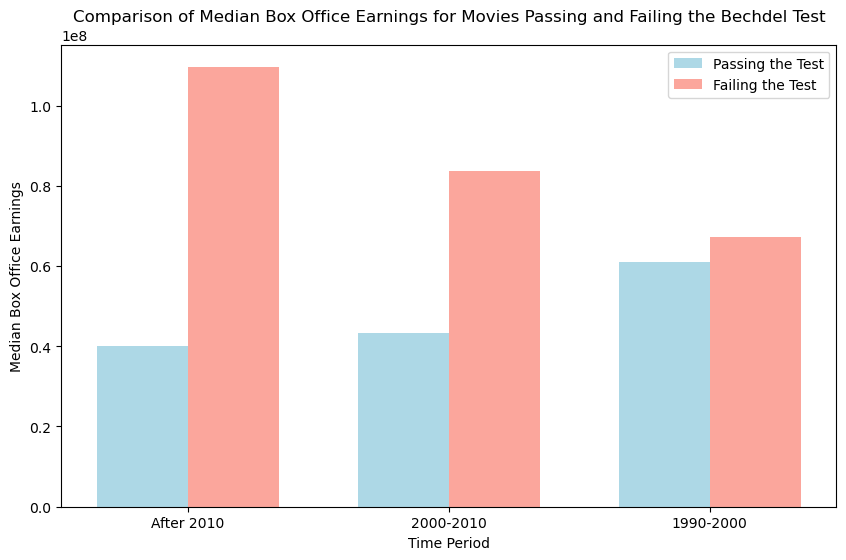

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Data
categories = ['After 2010', '2000-2010', '1990-2000']
pass_median_box_office = [40176042.0, 43408033.0, 61055139.0]
fail_median_box_office = [109666692.5, 83792062.0, 67235581.0]

# Adjust the position of the bars
bar_width = 0.35
index = np.arange(len(categories))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index - bar_width/2, pass_median_box_office, bar_width, color='lightblue', label='Passing the Test')
plt.bar(index + bar_width/2, fail_median_box_office, bar_width, color='salmon', label='Failing the Test', alpha=0.7)

# Labels and title
plt.xlabel('Time Period')
plt.ylabel('Median Box Office Earnings')
plt.title('Comparison of Median Box Office Earnings for Movies Passing and Failing the Bechdel Test')
plt.xticks(index, categories)
plt.legend()

# Show plot
plt.show()


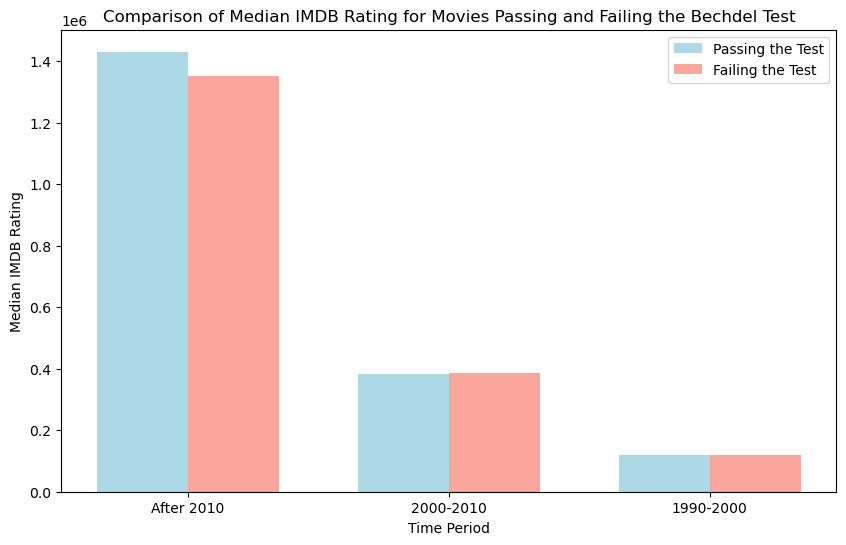

In [48]:
# Data
pass_median_imdb = [1431181.0, 382189.0, 118661.0]
fail_median_imdb = [1351685.0, 386140.0, 117858.0]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index - bar_width/2, pass_median_imdb, bar_width, color='lightblue', label='Passing the Test')
plt.bar(index + bar_width/2, fail_median_imdb, bar_width, color='salmon', label='Failing the Test', alpha=0.7)

# Labels and title
plt.xlabel('Time Period')
plt.ylabel('Median IMDB Rating')
plt.title('Comparison of Median IMDB Rating for Movies Passing and Failing the Bechdel Test')
plt.xticks(index, categories)
plt.legend()

# Show plot
plt.show()